<a href="https://colab.research.google.com/github/arzoogandhi7/Visual-object-analyzer/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0]

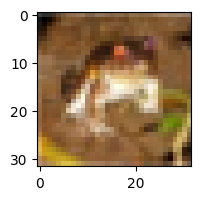

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

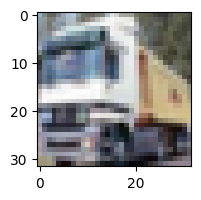

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

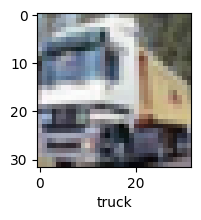

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train/255                 #divide for normalization so that array lies btn 0 and 1
X_test = X_test/255

In [ ]:
#ANN For image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),   #flatter-> first layer with shape 32*32*3 converts 3D->1D(3072)
        layers.Dense(3000, activation='relu'),   #deep layer 1 with 3000 neurons
        layers.Dense(1000, activation='relu'),   #deep layer 2 with 1000 neurons
        layers.Dense(10, activation='sigmoid')    #last layer with 10 categories

    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 142s 90ms/step - loss: 1.8145 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.6232 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.5424 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.4822 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4317 - accuracy: 0.4951


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.4455 - accuracy: 0.4864


[1.4455320835113525, 0.4864000082015991]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.53      0.55      1000
           1       0.69      0.49      0.57      1000
           2       0.39      0.36      0.37      1000
           3       0.40      0.26      0.32      1000
           4       0.53      0.20      0.29      1000
           5       0.42      0.38      0.40      1000
           6       0.46      0.66      0.54      1000
           7       0.43      0.70      0.53      1000
           8       0.53      0.69      0.60      1000
           9       0.54      0.59      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.47     10000
weighted avg       0.49      0.49      0.47     10000



Feature Extraction of CNN

In [ ]:
cnn = models.Sequential ([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers. Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # dense
    layers.Flatten(),
    layers. Dense (64, activation='relu'),
    layers. Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
               loss= 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4620 - accuracy: 0.4772
Epoch 2/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1120 - accuracy: 0.6109
Epoch 3/20
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9872 - accuracy: 0.6569
Epoch 4/20
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9063 - accuracy: 0.6866
Epoch 5/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8387 - accuracy: 0.7091
Epoch 6/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7839 - accuracy: 0.7289
Epoch 7/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7356 - accuracy: 0.7449
Epoch 8/20
1563/1563 [==============================] - 55s 36ms/step - loss: 0.6909 - accuracy: 0.7600
Epoch 9/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6524 - accuracy: 0.7737
Epoch 10/20
1563/1563 [==============================] - 57s 36m

In [ ]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 4s 11ms/step - loss: 1.7112 - accuracy: 0.6686


[1.7111921310424805, 0.6686000227928162]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]


313/313 [==============================] - 3s 10ms/step


array([[1.8247213e-11, 1.7352880e-09, 3.2968070e-05, 4.8407990e-01,
        1.6598791e-03, 3.3711590e-06, 2.0225575e-02, 3.0303660e-10,
        4.9399838e-01, 1.7032393e-11],
       [3.7423047e-06, 1.8403571e-07, 1.3486591e-10, 4.3562979e-14,
        9.9019143e-15, 1.3284469e-17, 2.1302697e-14, 7.7747843e-19,
        9.9999589e-01, 7.1907458e-08],
       [6.2152594e-01, 9.6563241e-03, 1.9842621e-04, 3.4595121e-04,
        8.3853643e-05, 1.6014121e-06, 9.1235142e-06, 6.9198362e-04,
        3.5465276e-01, 1.2834009e-02],
       [8.2885480e-01, 2.7989508e-08, 4.6554192e-06, 2.1656009e-04,
        1.4842414e-09, 2.8384820e-08, 9.0144503e-08, 1.7759943e-13,
        1.7092392e-01, 3.6551356e-10],
       [7.9640491e-14, 2.9940616e-12, 1.9544696e-05, 5.3813594e-05,
        9.3806410e-01, 1.8999980e-07, 6.1862357e-02, 8.4117457e-10,
        2.6792438e-10, 1.7660169e-15]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 0, 0, 4]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

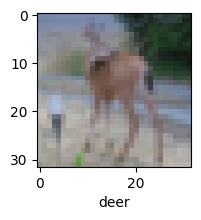

In [ ]:
plot_sample(X_test, y_test.ravel().astype(int), 100)

In [ ]:
classes[y_classes[100]]

'deer'

In [ ]:
print("Classification Reoprt: \n",classification_report(y_test,y_classes))

Classification Reoprt: 
               precision    recall  f1-score   support

           0       0.71      0.70      0.71      1000
           1       0.79      0.79      0.79      1000
           2       0.56      0.57      0.56      1000
           3       0.46      0.51      0.48      1000
           4       0.60      0.62      0.61      1000
           5       0.61      0.49      0.55      1000
           6       0.72      0.77      0.74      1000
           7       0.72      0.68      0.70      1000
           8       0.77      0.78      0.77      1000
           9       0.77      0.76      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [ ]:
classes[y_classes[4]]

'deer'